In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

In [3]:
def load_image(name, crop=False, y1=None, y2=None, x1=None, x2=None):
    image = cv2.imread(name, cv2.IMREAD_UNCHANGED)
    if(crop):
        image = image[y1:y2, x1:x2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [5]:
def threshold(image):
    ret, img_th = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return img_th

In [6]:
def cut_segment(image, segment):
    img_seg = cv2.bitwise_and(image, segment)
    return img_seg

In [7]:
def get_contour(img_th):
    contours, hierarchy = cv2.findContours(image=img_th, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
    lengths = [len(c) for c in contours]
    max = np.argmax(lengths)
    return contours[max]

In [8]:
def resize_image(img, factor):
    shape = img.shape
    return cv2.resize(img, (int(factor*img.shape[1]), int(factor*img.shape[0])))

In [9]:
def process(img):    
    img_gray = convert_to_grayscale(img)
    img_th = threshold(img_gray)
    contour = get_contour(img_th)    
    area = cv2.contourArea(contour)
    arc = cv2.arcLength(contour, True)    
    return (area, arc)

In [11]:
### OVDJE SE DEFINIRAJU PODATCI ###

#direktorij koji sadrzi slike
path = 'D:/Biofilm/Triplikati_foto/1/TIFF'

# broj reprezentativnih slika koje se uzimaju za croppanje
reps = 5

In [12]:
files = os.listdir(path)

index_list = []
for i in range(reps):
    index_list.append(int(i*(len(files)-1)/(reps-1)))

Xs = []
Ys = []
Ws = []
Hs = []

for index in index_list:
    file_path = path + '/' + files[index]
    img = load_image(file_path, False, 500, 3500, 1000, 5000)
    
    img_resized = resize_image(img, 0.2)
    
    x, y, w, h = cv2.selectROI(img_resized)
    cv2.waitKey()
    cv2.destroyAllWindows()
    
    x = int(x/0.2)
    y = int(y/0.2)
    w = int(w/0.2)
    h = int(h/0.2)
    
    Xs.append(x)
    Ys.append(y)
    Ws.append(w)
    Hs.append(h)

In [13]:
def get_cropping_dimensions(index, index_list, Xs, Ys, Ws, Hs):
    current_index = 0
    while(index > index_list[current_index+1]):
        current_index = current_index + 1
        
    diff = index_list[current_index+1] - index_list[current_index]
    X_diff = (Xs[current_index] - Xs[current_index+1])/diff
    Y_diff = (Ys[current_index] - Ys[current_index+1])/diff
    W_diff = (Ws[current_index+1] - Ws[current_index])/diff
    H_diff = (Hs[current_index+1] - Hs[current_index])/diff
    
    X = Xs[current_index] - int((index - index_list[current_index])*X_diff)
    Y = Ys[current_index] - int((index - index_list[current_index])*Y_diff)
    W = Ws[current_index] + int((index - index_list[current_index])*W_diff)
    H = Hs[current_index] + int((index - index_list[current_index])*H_diff)
    
    return (X, Y, W, H)

In [31]:
area_list = []
length_list = []

In [32]:
for file_index in range(len(files)):
    file_path = path + '/' + files[file_index]
    (X, Y, W, H) = get_cropping_dimensions(file_index, index_list, Xs, Ys, Ws, Hs)
    img = load_image(file_path, True, Y, Y+H, X, X+W)
    (area, length) = process(img)
    area_list.append(area)
    length_list.append(length)
    print(file_index)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

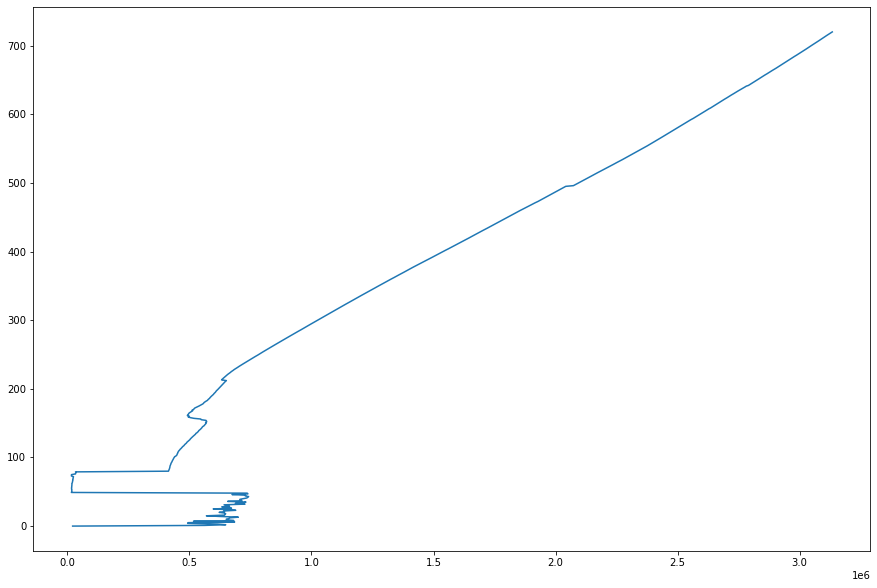

In [33]:
figure = plt.figure()
figure.set_figwidth(15)
figure.set_figheight(10)

plt.plot(area_list, range(721))
plt.show()

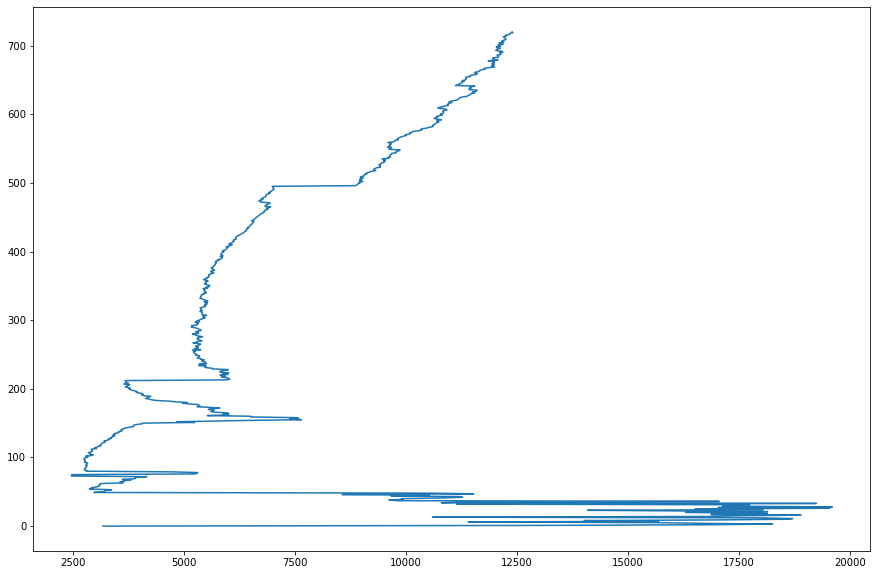

In [34]:
figure = plt.figure()
figure.set_figwidth(15)
figure.set_figheight(10)

plt.plot(length_list, range(721))
plt.show()

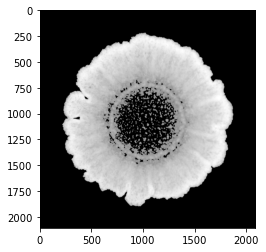

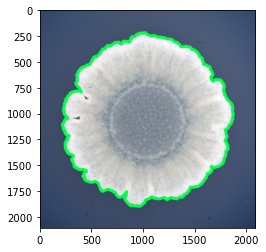

490
2014170.5
7043.776486039162


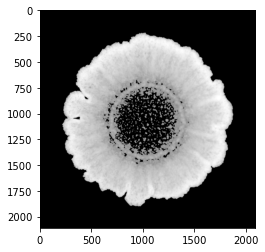

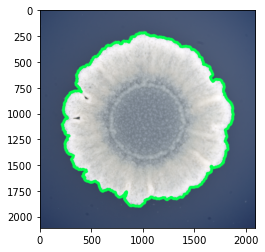

491
2019131.0
7030.244522333145


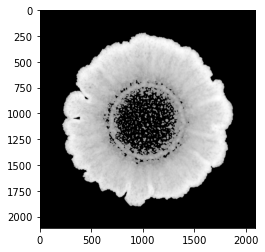

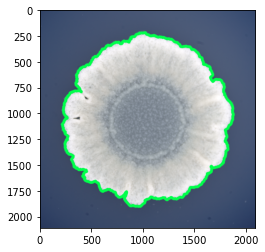

492
2024086.5
7013.374465107918


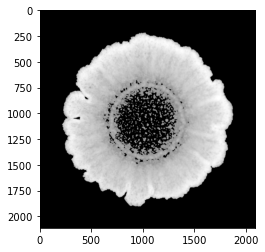

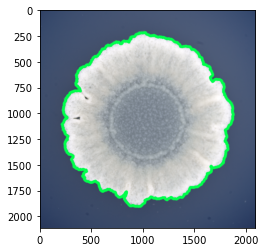

493
2029765.0
7002.965303897858


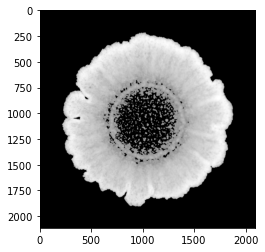

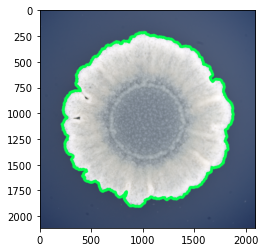

494
2034821.0
6999.107439279556


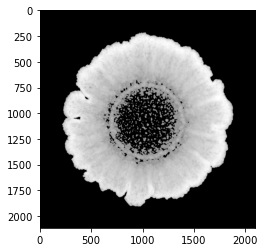

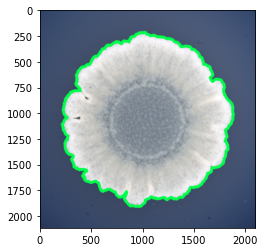

495
2039948.5
7004.604913115501


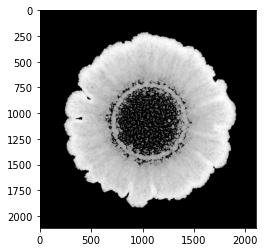

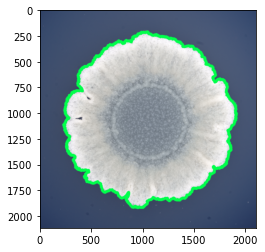

496
2071795.0
8890.252874135971


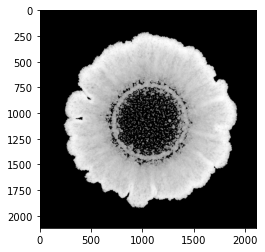

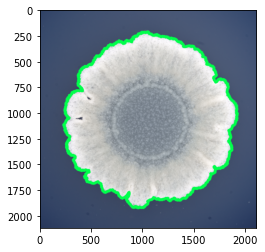

497
2076863.5
8997.892483353615


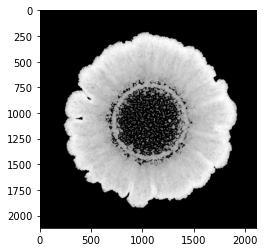

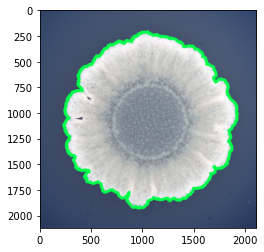

498
2081944.5
9088.662035346031


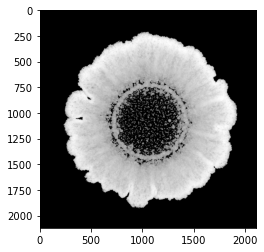

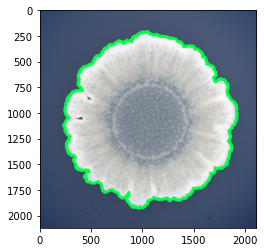

499
2087775.5
8974.15236890316


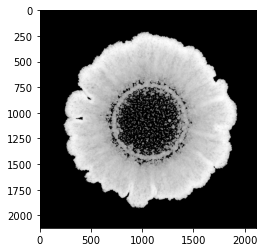

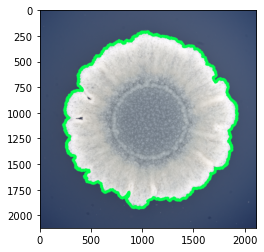

500
2093112.5
9033.524952292442


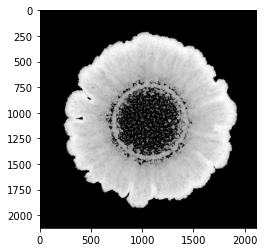

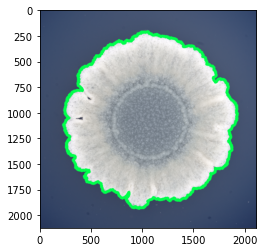

501
2098568.0
9055.791978120804


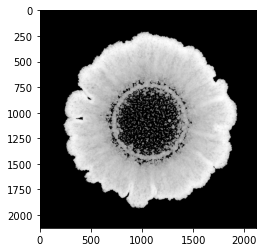

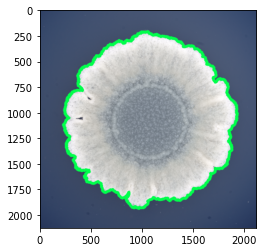

502
2103708.5
9023.240681529045


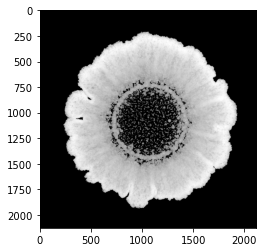

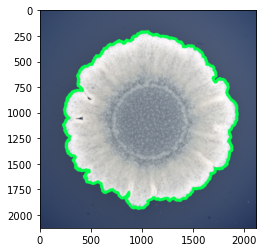

503
2108915.5
9052.034618735313


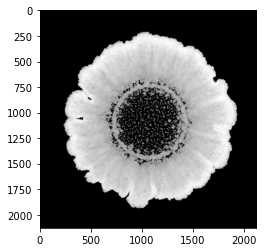

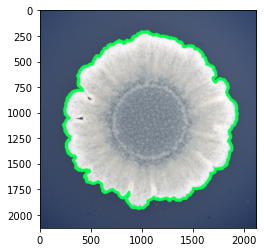

504
2113892.0
9008.797030448914


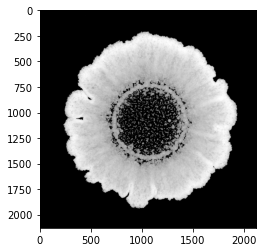

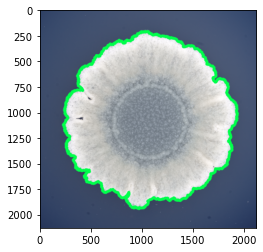

505
2119213.5
8992.779785513878


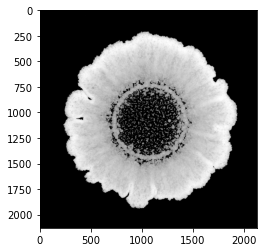

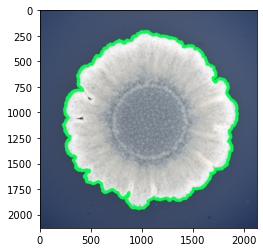

506
2124336.0
8941.708717823029


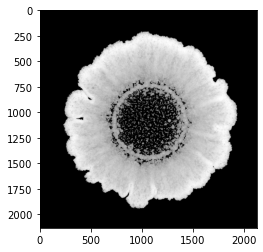

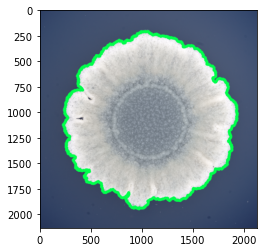

507
2129904.5
8940.63765013218


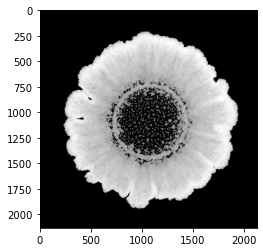

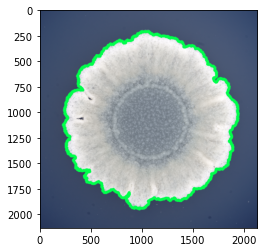

508
2135042.0
9008.73815536499


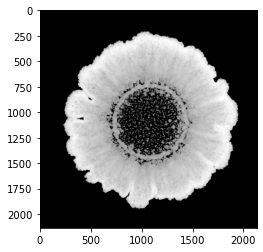

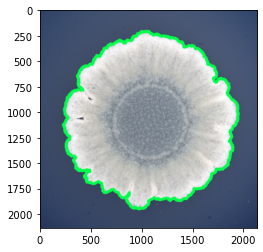

509
2140263.5
9040.294504284859


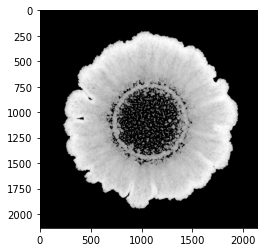

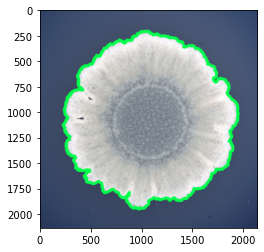

510
2145351.0
9071.992988586426


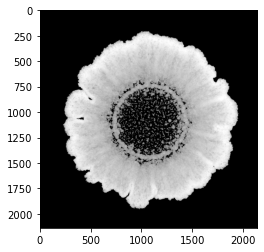

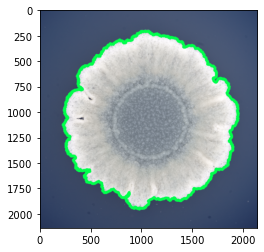

511
2150638.5
9106.578775048256


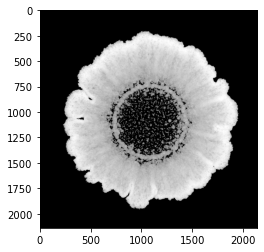

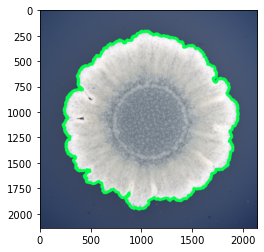

512
2155817.0
9148.880290746689


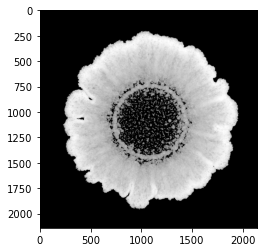

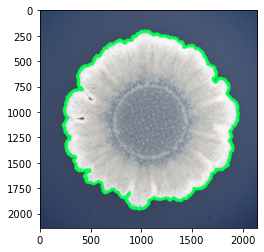

513
2160974.5
9167.63259780407


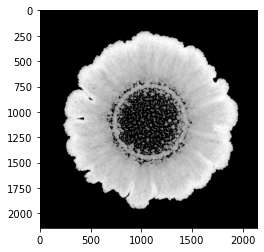

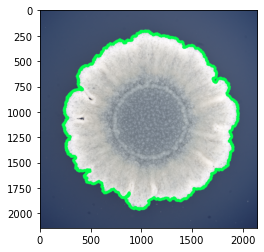

514
2166636.0
9217.87523841858


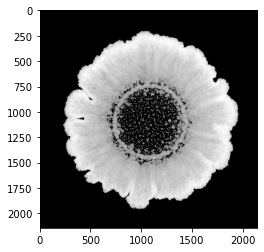

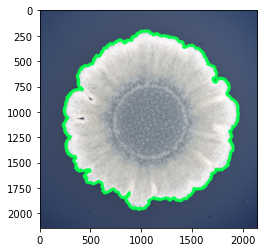

515
2171305.5
9283.97574365139


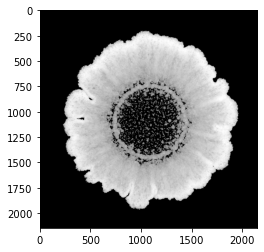

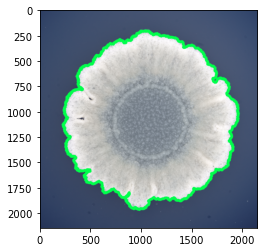

516
2177119.5
9189.549337506294


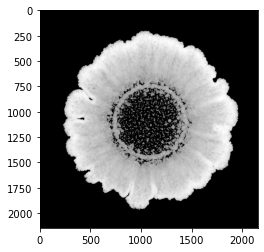

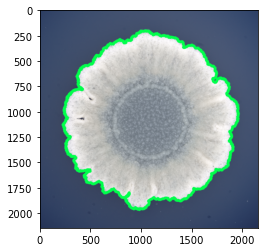

517
2182073.5
9172.662035346031


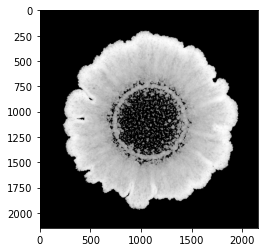

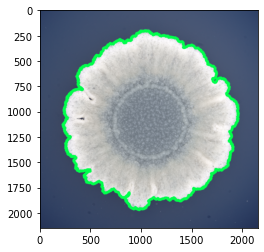

518
2187562.5
9235.97574365139


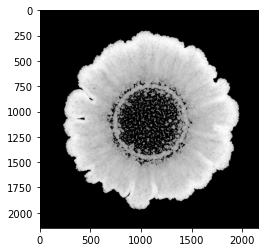

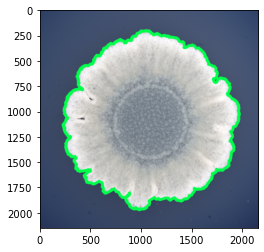

519
2192722.5
9334.201139330864


In [14]:
### KOD ZA TESTIRANJE ###

for file_index in range(490, 520, 1):

    file_path = path + '/' + files[file_index]
    (X, Y, W, H) = get_cropping_dimensions(file_index, index_list, Xs, Ys, Ws, Hs)
    img = load_image(file_path, True, Y, Y+H, X, X+W)

    img_gray = convert_to_grayscale(img)
    img_th = threshold(img_gray)
    img_seg = cut_segment(img_gray, img_th)
    plt.imshow(img_seg, cmap='gray')
    plt.show()

    contour = get_contour(img_th)
    img2 = img.copy()
    img2 = cv2.drawContours(image=img2, contours=contour, contourIdx=-1, color=(0, 255, 75), thickness=25, lineType=cv2.LINE_AA)
    plt.imshow(img2)
    plt.show()

    area = cv2.contourArea(contour)
    arc = cv2.arcLength(contour, True)
    print(file_index)
    print(area)
    print(arc)
